In [1]:
import pandas as pd
import numpy as np
import os

import re

# libraries for nlp
import string
import nltk
from textblob import TextBlob


In [51]:
# for visualization
import matplotlib.pyplot as plt
%matplotlib inline 
import matplotlib.gridspec as gridspec 
import seaborn as sns

In [328]:
# For Machine learning
import scipy.stats as ss
from scipy import sparse
import sklearn as skl
from sklearn.model_selection import train_test_split
from sklearn import model_selection, preprocessing, linear_model, metrics, decomposition

In [330]:
# For Text modeling
from nltk import pos_tag
from textblob import Word
from wordcloud import WordCloud ,STOPWORDS
from nltk.stem.wordnet import WordNetLemmatizer 
from nltk.tokenize import word_tokenize

# Tweet tokenizer does not split at apostophes which is what we want
from nltk.tokenize import TweetTokenizer   


#FeatureEngineering
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer, HashingVectorizer, TfidfTransformer
from sklearn.decomposition import TruncatedSVD, LatentDirichletAllocation

In [33]:

nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')

from nltk.corpus import stopwords
#print(stopwords.words('english'))  


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Divya\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Divya\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Divya\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\Divya\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


In [115]:
!pip install -U textblob
!python -m textblob.download_corpora



Finished.


[nltk_data] Downloading package brown to
[nltk_data]     C:\Users\Divya\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\brown.zip.
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Divya\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Divya\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\Divya\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package conll2000 to
[nltk_data]     C:\Users\Divya\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\conll2000.zip.
[nltk_data] Downloading package movie_reviews to
[nltk_data]     C:\Users\Divya\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\movie_reviews.zip.


In [2]:
os.chdir('C:\\Users\\Divya\\Desktop\\Analytix Class data\\Projects\\ML\\15. Capstone Case Study - NLP- Woman Clothing E-Commerce Platform')

In [226]:
wcr=pd.read_excel('Womens Clothing Reviews Data.xlsx')

In [227]:
wcr.head()

,Product ID,Category,Subcategory1,SubCategory2,Location,Channel,Customer Age,Review Title,Review Text,Rating,Recommend Flag
0,767,Initmates,Intimate,Intimates,Mumbai,Mobile,33,NaN,Absolutely wonderful - silky and sexy and comf...,4,1
1,1080,General,Dresses,Dresses,Bangalore,Mobile,34,NaN,Love this dress! it's sooo pretty. i happene...,5,1
2,1077,General,Dresses,Dresses,Gurgaon,Mobile,60,Some major design flaws,I had such high hopes for this dress and reall...,3,0
3,1049,General Petite,Bottoms,Pants,Chennai,Web,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,1
4,847,General,Tops,Blouses,Bangalore,Web,47,Flattering shirt,This shirt is very flattering to all due to th...,5,1


In [228]:
wcr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23486 entries, 0 to 23485
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Product ID      23486 non-null  int64 
 1   Category        23472 non-null  object
 2   Subcategory1    23472 non-null  object
 3   SubCategory2    23472 non-null  object
 4   Location        23486 non-null  object
 5   Channel         23486 non-null  object
 6   Customer Age    23486 non-null  int64 
 7   Review Title    19676 non-null  object
 8   Review Text     22641 non-null  object
 9   Rating          23486 non-null  int64 
 10  Recommend Flag  23486 non-null  int64 
dtypes: int64(4), object(7)
memory usage: 2.0+ MB


In [229]:
wcr.shape

(23486, 11)

In [7]:
df_wrc =wcr.iloc[:,:9]

In [8]:
df_wrc.head()

,Product ID,Category,Subcategory1,SubCategory2,Location,Channel,Customer Age,Review Title,Review Text
0,767,Initmates,Intimate,Intimates,Mumbai,Mobile,33,NaN,Absolutely wonderful - silky and sexy and comf...
1,1080,General,Dresses,Dresses,Bangalore,Mobile,34,NaN,Love this dress! it's sooo pretty. i happene...
2,1077,General,Dresses,Dresses,Gurgaon,Mobile,60,Some major design flaws,I had such high hopes for this dress and reall...
3,1049,General Petite,Bottoms,Pants,Chennai,Web,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl..."
4,847,General,Tops,Blouses,Bangalore,Web,47,Flattering shirt,This shirt is very flattering to all due to th...


### a. Basic Exploratory Analysis

### Missing values

In [9]:
wcr.isnull().sum()

Product ID           0
Category            14
Subcategory1        14
SubCategory2        14
Location             0
Channel              0
Customer Age         0
Review Title      3810
Review Text        845
Rating               0
Recommend Flag       0
dtype: int64

In [232]:
wcr.dropna(axis = 0, how= "any", inplace = True)
wcr.head()

,Product ID,Category,Subcategory1,SubCategory2,Location,Channel,Customer Age,Review Title,Review Text,Rating,Recommend Flag
2,1077,General,Dresses,Dresses,Gurgaon,Mobile,60,Some major design flaws,I had such high hopes for this dress and reall...,3,0
3,1049,General Petite,Bottoms,Pants,Chennai,Web,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,1
4,847,General,Tops,Blouses,Bangalore,Web,47,Flattering shirt,This shirt is very flattering to all due to th...,5,1
5,1080,General,Dresses,Dresses,Gurgaon,Web,49,Not for the very petite,"I love tracy reese dresses, but this one is no...",2,0
6,858,General Petite,Tops,Knits,Gurgaon,Mobile,39,Cagrcoal shimmer fun,I aded this in my basket at hte last mintue to...,5,1


In [233]:
wcr.isnull().sum()

Product ID        0
Category          0
Subcategory1      0
SubCategory2      0
Location          0
Channel           0
Customer Age      0
Review Title      0
Review Text       0
Rating            0
Recommend Flag    0
dtype: int64

In [234]:
wcr.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19662 entries, 2 to 23485
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Product ID      19662 non-null  int64 
 1   Category        19662 non-null  object
 2   Subcategory1    19662 non-null  object
 3   SubCategory2    19662 non-null  object
 4   Location        19662 non-null  object
 5   Channel         19662 non-null  object
 6   Customer Age    19662 non-null  int64 
 7   Review Title    19662 non-null  object
 8   Review Text     19662 non-null  object
 9   Rating          19662 non-null  int64 
 10  Recommend Flag  19662 non-null  int64 
dtypes: int64(4), object(7)
memory usage: 1.8+ MB


In [235]:
wcr.rename(columns={'Product ID':'Product_ID','Customer Age': 'Customer_Age','Review Title':'Review_Title','Review Text': 'Review_Text', 'Recommend Flag':'Recommend_Flag'}, inplace=True)

In [236]:
wcr.columns

Index(['Product_ID', 'Category', 'Subcategory1', 'SubCategory2', 'Location',
       'Channel', 'Customer_Age', 'Review_Title', 'Review_Text', 'Rating',
       'Recommend_Flag'],
      dtype='object')

In [237]:
wcr.value_counts('Recommend_Flag')

Recommend_Flag
1    16087
0     3575
dtype: int64

In [238]:
percentage_1s= (19314)*100/(19314+4172)
print('Percentge of 1s is :', percentage_1s)
percentage_0s= (4172)*100/(19314+4172)
print('Percentge of 0s is :', percentage_0s)

Percentge of 1s is : 82.23622583666865
Percentge of 0s is : 17.763774163331345


#### From the above calculation of 1s and 0s, we can say that data are almost balanced. 
##### Here we consider 80:20 ratio is in balance data sets.

### a. Performing exploratory analysis on the data to understand the patterns

In [17]:
df_wrc =wcr.iloc[:,:9]
df_wrc.head(2)

,Product_ID,Category,Subcategory1,SubCategory2,Location,Channel,Customer_Age,Review_Title,Review_Text
2,1077,General,Dresses,Dresses,Gurgaon,Mobile,60,Some major design flaws,I had such high hopes for this dress and reall...
3,1049,General Petite,Bottoms,Pants,Chennai,Web,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl..."


In [18]:
# count sentence in each review#
df_wrc['Review_Text'] = df_wrc['Review_Text'].astype(str)
df_wrc['count_sent']=df_wrc['Review_Text'].apply(lambda x: len(re.findall("\n",str(x)))+1)

In [19]:
#Unique word count
df_wrc['count_unique_word']=df_wrc['Review_Text'].apply(lambda x: len(set(str(x).split())))

In [20]:
#Letter count
df_wrc['count_letters']=df_wrc['Review_Text'].apply(lambda x: len(str(x)))

#Word count in each comment:
df_wrc['count_word']=df_wrc['Review_Text'].apply(lambda x: len(str(x).split()))

#Word density
df_wrc['word_density'] = df_wrc['count_letters'] / (df_wrc['count_word']+1)

In [21]:
# upper case words count
df_wrc["count_words_upper"] = df_wrc['Review_Text'].apply(lambda x: len([w for w in str(x).split() if w.isupper()]))

# lower case words count
df_wrc["count_words_lower"] = df_wrc["Review_Text"].apply(lambda x: len([w for w in str(x).split() if w.islower()]))

#title case words count
df_wrc["count_words_title"] = df_wrc["Review_Text"].apply(lambda x: len([w for w in str(x).split() if w.istitle()]))


In [87]:
#Number of stopwords
df_wrc["count_stopwords"] = df_wrc["Review_Text"].apply(lambda x: len([w for w in str(x).lower().split() if w in set(nltk.corpus.stopwords.words("english"))]))

#Average length of the words
df_wrc["mean_word_len"] = df_wrc["Review_Text"].apply(lambda x: np.mean([len(w) for w in str(x).split()]))


In [36]:
#Number of Words ends with
df_wrc['words_ends_with_et'] = df_wrc['Review_Text'].apply(lambda x :len([x for x in x.lower().split() if x.endswith('et')]))

#Number of Words ends with
df_wrc['words_start_with_no'] = df_wrc['Review_Text'].apply(lambda x :len([x for x in x.lower().split() if x.startswith('no')]))

# Count the occurences of all words
df_wrc['wordcounts'] = df_wrc['Review_Text'].apply(lambda x :dict([ [t, x.split().count(t)] for t in set(x.split()) ]))


In [88]:
df_wrc.head()

,Product_ID,Category,Subcategory1,SubCategory2,Location,Channel,Customer_Age,Review_Title,Review_Text,count_sent,...,count_word,word_density,count_words_upper,count_words_lower,count_words_title,words_ends_with_et,words_start_with_no,wordcounts,mean_word_len,count_stopwords
2,1077,General,Dresses,Dresses,Gurgaon,Mobile,60,Some major design flaws,I had such high hopes for this dress and reall...,1,...,98,5.050505,1,96,1,1,1,"{'wanted': 1, 'for': 2, 'small.': 1, 'just': 1...",4.112245,46
3,1049,General Petite,Bottoms,Pants,Chennai,Web,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",1,...,22,5.391304,1,21,1,1,1,"{'it's': 1, 'every': 1, 'nothing': 1, 'love,':...",4.681818,7
4,847,General,Tops,Blouses,Bangalore,Web,47,Flattering shirt,This shirt is very flattering to all due to th...,1,...,36,5.189189,0,35,1,0,0,"{'front': 1, 'to': 3, 'due': 1, 'so': 1, 'card...",4.361111,20
5,1080,General,Dresses,Dresses,Gurgaon,Web,49,Not for the very petite,"I love tracy reese dresses, but this one is no...",1,...,98,4.929293,1,96,1,1,3,"{'for': 1, 'just': 2, 'feet': 1, 'of': 4, 'bra...",3.989796,56
6,858,General Petite,Tops,Knits,Gurgaon,Mobile,39,Cagrcoal shimmer fun,I aded this in my basket at hte last mintue to...,1,...,101,4.862745,1,97,1,2,1,"{'color': 2, 'jkeep': 1, 'my': 2, ']kept': 1, ...",3.920792,48


### b. Perform text mining tasks to understand what most frequent words are using for positive sentiment and negative sentiment. Create word clouds for the positive & negative reviews separately.

#### Exploratory Analysis on Review_Text

In [39]:
df_txt=wcr
df_txt.head()

,Product_ID,Category,Subcategory1,SubCategory2,Location,Channel,Customer_Age,Review_Title,Review_Text,Rating,Recommend_Flag,sentiment,sentiment_cat
2,1077,General,Dresses,Dresses,Gurgaon,Mobile,60,Some major design flaws,I had such high hopes for this dress and reall...,3,0,0.073675,Negative
3,1049,General Petite,Bottoms,Pants,Chennai,Web,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,1,0.550000,Positive
4,847,General,Tops,Blouses,Bangalore,Web,47,Flattering shirt,This shirt is very flattering to all due to th...,5,1,0.512891,Positive
5,1080,General,Dresses,Dresses,Gurgaon,Web,49,Not for the very petite,"I love tracy reese dresses, but this one is no...",2,0,0.178750,Positive
6,858,General Petite,Tops,Knits,Gurgaon,Mobile,39,Cagrcoal shimmer fun,I aded this in my basket at hte last mintue to...,5,1,0.133750,Positive


In [40]:
df_txt['Review_Text'] = df_txt['Review_Text'].astype(str)
df_txt['sentiment'] = df_txt["Review_Text"].apply(lambda x: TextBlob(x).sentiment.polarity )

In [41]:
# DMake column for positive, negative and neutral sentiments
df_txt['sentiment_cat'] = np.where(df_txt.sentiment>0.1,'Positive', np.where(df_txt.sentiment<0.1, 'Negative', 'Neutral'))

In [42]:
df_txt.head()

,Product_ID,Category,Subcategory1,SubCategory2,Location,Channel,Customer_Age,Review_Title,Review_Text,Rating,Recommend_Flag,sentiment,sentiment_cat
2,1077,General,Dresses,Dresses,Gurgaon,Mobile,60,Some major design flaws,I had such high hopes for this dress and reall...,3,0,0.073675,Negative
3,1049,General Petite,Bottoms,Pants,Chennai,Web,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,1,0.550000,Positive
4,847,General,Tops,Blouses,Bangalore,Web,47,Flattering shirt,This shirt is very flattering to all due to th...,5,1,0.512891,Positive
5,1080,General,Dresses,Dresses,Gurgaon,Web,49,Not for the very petite,"I love tracy reese dresses, but this one is no...",2,0,0.178750,Positive
6,858,General Petite,Tops,Knits,Gurgaon,Mobile,39,Cagrcoal shimmer fun,I aded this in my basket at hte last mintue to...,5,1,0.133750,Positive


In [43]:
cat_val=df_txt.sentiment_cat.value_counts()
cat_val

Positive    16191
Negative     3450
Neutral        21
Name: sentiment_cat, dtype: int64

<Axes: title={'center': ' Sentiment categories count'}>

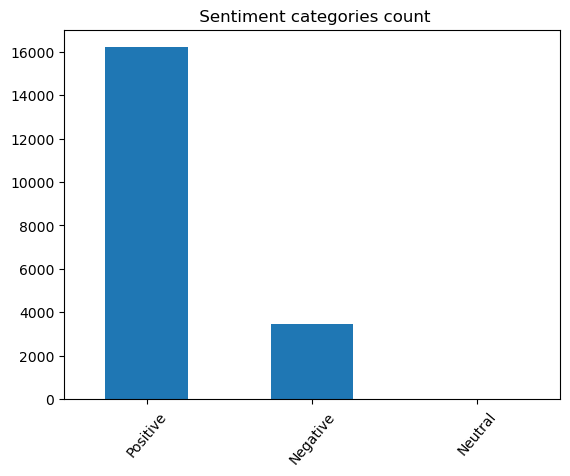

In [62]:
cat_val.plot(kind='bar', title=' Sentiment categories count', rot=50)

In [63]:
# Make three segment for each sentiments
neg = df_txt[(df_txt.sentiment_cat=='Negative')]
pos = df_txt[(df_txt.sentiment_cat=='Positive')]
neutral = df_txt[(df_txt.sentiment_cat=='Neutral')]

#### Train test split

In [80]:
# Target variable y is Rating
X = wcr.Review_Text
y = wcr.Rating

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

#### For positive sentiments and negative sentiments, split the data into train & test 

In [81]:
X2 = pos.Review_Text
y2 = pos.Rating

# split the new DataFrame into training and testing sets
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, random_state=1)

In [82]:
# define X and y for negative sentiments
X1 = neg.Review_Text
y1 = neg.Rating

# split the new DataFrame into training and testing sets
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, random_state=1)

### UDF for text cleaning

In [83]:
#Abbrevations and Words correction
def clean_text(Review_Text):
    Review_Text = Review_Text.lower()
    Review_Text = Review_Text.strip()
    Review_Text = re.sub(r' +', ' ', Review_Text)
    Review_Text = re.sub(r"[-()\"#/@;:{}`+=~|.!?*&£%€¦_><‘|,'0-9]", "", Review_Text)
    Review_Text = Review_Text.replace('wat', 'what').replace('txts', 'texts').replace('vry', 'very').replace('gud', 'good').replace('nyt', 'night').replace('msg', 'message')
    return(Review_Text)

In [86]:
sw = list(set(nltk.corpus.stopwords.words('english')))
print(sw)

['through', 'to', 'nor', 'below', 'not', 'the', "aren't", "wasn't", 'them', 'yourself', 'here', "isn't", "shouldn't", 'how', 'hadn', 'itself', 'which', 'it', 'does', "didn't", 's', 'she', "mustn't", 'himself', 'there', 'wouldn', 'own', 'shouldn', 'd', 'can', 'y', 'we', 'up', "couldn't", 'couldn', 'what', 'only', "doesn't", 'won', 'are', 'its', 'am', 'off', "you're", 'needn', 'by', 'any', 'for', 'of', "hadn't", 'whom', 'their', 'above', 'isn', 'both', 'being', 'where', 'haven', 'after', 'ours', 'have', 'do', 'most', "weren't", 'this', 'were', "won't", 'then', 'during', "you've", 'why', "that'll", 'doesn', 'ourselves', 're', "wouldn't", 'was', 'under', 'a', 'and', 'they', 'myself', 'some', 'those', 'll', 'has', 'yours', 'an', 'until', 'when', 'now', 'ma', 'once', 'in', 'as', "shan't", 'weren', 'be', 'themselves', 'between', 'your', 'too', 'these', 'just', 'same', "haven't", 'him', 'about', 'mustn', 'don', 'had', 'other', "don't", 'he', 'more', "hasn't", 'm', 'will', 'before', 'at', 'with

### UDF for pre-processing

In [151]:
import string
def pre_process(Review_Text):
    Review_Text = Review_Text.str.replace('/','')                           
    x in x.s
    Review_Text = Review_Text.apply(lambda x: " ".join(x for x in x.split() if x not in sw)) #Removing stop words
    Review_Text = Review_Text.apply(lambda x: " ".join([Word(word).lemmatize() for word in x.split()]))   #lemmatization
    return(Review_Text)

In [89]:
X_train = X_train.apply(lambda x: clean_text(x))
X_test = X_test.apply(lambda x: clean_text(x))

In [148]:
X_train=pre_process(X_train)
X_test=pre_process(X_test)

In [92]:
# Clean the text for positive sentiments
X2_train = X2_train.apply(lambda x: clean_text(x))
X2_test = X2_test.apply(lambda x: clean_text(x))

In [150]:
X2_train=pre_process(X_train)
X2_test=pre_process(X_test)

In [93]:
# Clean the text for negative sentiments
X1_train = X1_train.apply(lambda x: clean_text(x))
X1_test = X1_test.apply(lambda x: clean_text(x))

In [149]:
X1_train=pre_process(X_train)
X1_test=pre_process(X_test)

### Vectorization

In [152]:
# For train data- positive sentiment
count_vect2 = CountVectorizer(analyzer='word', token_pattern=r'\w{1,}', 
                             ngram_range=(1, 1 ), 
                             min_df=5, 
                             encoding='latin-1' ,
                             max_features=800)
xtrain2_count = count_vect2.fit_transform(X2_train)

In [153]:
# For train data- negative sentiment
count_vect1 = CountVectorizer(analyzer='word', token_pattern=r'\w{1,}', 
                             ngram_range=(1, 1 ), 
                             min_df=5, 
                             encoding='latin-1' ,
                             max_features=800)
xtrain1_count = count_vect1.fit_transform(X1_train)

In [154]:
#  For positive sentiments- see the document term metrics
dtm_pos=xtrain2_count.toarray()
print(count_vect2.get_feature_names_out())

['able' 'absolutely' 'across' 'actually' 'add' 'added' 'addition'
 'adorable' 'adore' 'afraid' 'ag' 'ago' 'agree' 'airy' 'aline' 'almost'
 'along' 'already' 'also' 'although' 'always' 'amazing' 'amount'
 'anighthing' 'ankle' 'another' 'anyone' 'anyway' 'appears' 'appropriate'
 'area' 'arent' 'arm' 'armhole' 'around' 'arrived' 'athletic' 'available'
 'average' 'away' 'awesome' 'awkward' 'b' 'baby' 'back' 'bad' 'bag'
 'baggy' 'band' 'barely' 'based' 'basic' 'bc' 'beach' 'beading'
 'beautiful' 'beautifully' 'beige' 'believe' 'belly' 'belt' 'best'
 'better' 'big' 'bigger' 'bit' 'black' 'blazer' 'blouse' 'blue' 'bodice'
 'body' 'boot' 'booty' 'bottom' 'bought' 'boxy' 'bra' 'brand' 'bright'
 'broad' 'brown' 'build' 'bulky' 'bust' 'busty' 'butt' 'button' 'buy'
 'buying' 'c' 'came' 'cami' 'camisole' 'cannot' 'cant' 'cardigan' 'care'
 'case' 'casual' 'caught' 'chance' 'cheap' 'chest' 'chested' 'chic'
 'classic' 'classy' 'clean' 'clingy' 'close' 'closet' 'clothes' 'clothing'
 'coat' 'cold' 'coll

In [155]:
dtm1_pos=pd.DataFrame(dtm_pos, columns = count_vect2.get_feature_names_out())
dtm1_pos

,able,absolutely,across,actually,add,added,addition,adorable,adore,afraid,...,xsp,xx,year,yellow,yes,yesterday,yet,youre,zip,zipper
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,1,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14741,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
14742,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
14743,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
14744,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [156]:
dtm1_pos.sum()

able          285
absolutely    528
across        224
actually      464
add           402
             ... 
yesterday      84
yet           405
youre         252
zip           114
zipper        265
Length: 800, dtype: int64

In [157]:
#  For positive sentiments- see the document term metrics
dtm_neg=xtrain1_count.toarray()
print(count_vect2.get_feature_names_out())

['able' 'absolutely' 'across' 'actually' 'add' 'added' 'addition'
 'adorable' 'adore' 'afraid' 'ag' 'ago' 'agree' 'airy' 'aline' 'almost'
 'along' 'already' 'also' 'although' 'always' 'amazing' 'amount'
 'anighthing' 'ankle' 'another' 'anyone' 'anyway' 'appears' 'appropriate'
 'area' 'arent' 'arm' 'armhole' 'around' 'arrived' 'athletic' 'available'
 'average' 'away' 'awesome' 'awkward' 'b' 'baby' 'back' 'bad' 'bag'
 'baggy' 'band' 'barely' 'based' 'basic' 'bc' 'beach' 'beading'
 'beautiful' 'beautifully' 'beige' 'believe' 'belly' 'belt' 'best'
 'better' 'big' 'bigger' 'bit' 'black' 'blazer' 'blouse' 'blue' 'bodice'
 'body' 'boot' 'booty' 'bottom' 'bought' 'boxy' 'bra' 'brand' 'bright'
 'broad' 'brown' 'build' 'bulky' 'bust' 'busty' 'butt' 'button' 'buy'
 'buying' 'c' 'came' 'cami' 'camisole' 'cannot' 'cant' 'cardigan' 'care'
 'case' 'casual' 'caught' 'chance' 'cheap' 'chest' 'chested' 'chic'
 'classic' 'classy' 'clean' 'clingy' 'close' 'closet' 'clothes' 'clothing'
 'coat' 'cold' 'coll

In [158]:
dtm1_neg=pd.DataFrame(dtm_neg, columns = count_vect1.get_feature_names_out())
dtm1_neg

,able,absolutely,across,actually,add,added,addition,adorable,adore,afraid,...,xsp,xx,year,yellow,yes,yesterday,yet,youre,zip,zipper
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,1,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14741,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
14742,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
14743,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
14744,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [159]:
dtm1_neg.sum()

able          285
absolutely    528
across        224
actually      464
add           402
             ... 
yesterday      84
yet           405
youre         252
zip           114
zipper        265
Length: 800, dtype: int64

### Word frequency

In [160]:
# For positive sentiment
word_freq = pd.DataFrame(dtm1_pos.sum().head(40), columns=['Word_Freqency'])
word_freq.sort_values('Word_Freqency', ascending=False, inplace=True)
word_freq

,Word_Freqency
also,1718
arm,1009
around,772
absolutely,528
area,501
another,485
actually,464
almost,458
add,402
always,387


In [168]:
word_freq_dict_pos = dict(dtm1_pos.sum())
word_freq_dict_pos

{'able': 285,
 'absolutely': 528,
 'across': 224,
 'actually': 464,
 'add': 402,
 'added': 122,
 'addition': 136,
 'adorable': 362,
 'adore': 85,
 'afraid': 77,
 'ag': 82,
 'ago': 94,
 'agree': 240,
 'airy': 102,
 'aline': 85,
 'almost': 458,
 'along': 125,
 'already': 243,
 'also': 1718,
 'although': 285,
 'always': 387,
 'amazing': 328,
 'amount': 155,
 'anighthing': 275,
 'ankle': 234,
 'another': 485,
 'anyone': 110,
 'anyway': 132,
 'appears': 141,
 'appropriate': 124,
 'area': 501,
 'arent': 92,
 'arm': 1009,
 'armhole': 169,
 'around': 772,
 'arrived': 241,
 'athletic': 151,
 'available': 175,
 'average': 79,
 'away': 231,
 'awesome': 149,
 'awkward': 113,
 'b': 289,
 'baby': 121,
 'back': 2107,
 'bad': 261,
 'bag': 98,
 'baggy': 194,
 'band': 109,
 'barely': 104,
 'based': 189,
 'basic': 152,
 'bc': 93,
 'beach': 98,
 'beading': 81,
 'beautiful': 1850,
 'beautifully': 296,
 'beige': 77,
 'believe': 104,
 'belly': 106,
 'belt': 298,
 'best': 336,
 'better': 872,
 'big': 1180,
 '

<Axes: >

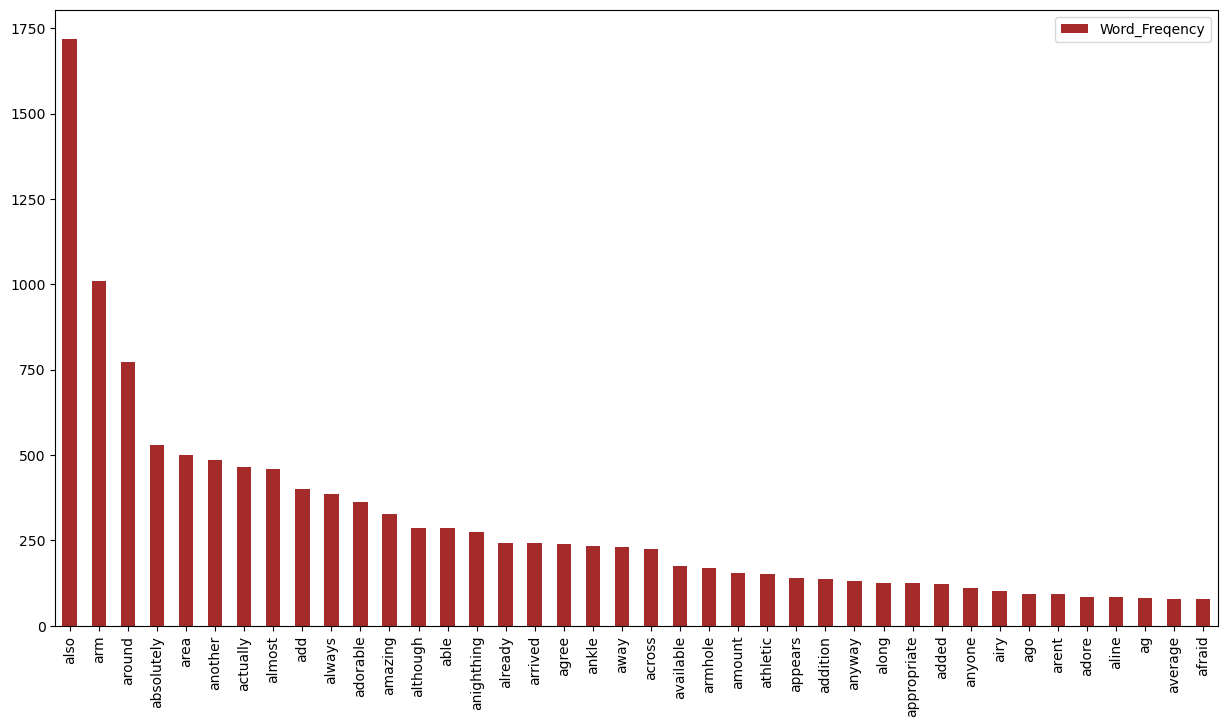

In [162]:
word_freq.plot(kind='bar', figsize=(15,8), color='brown')

In [185]:
# For positive sentiment
word_freq_neg = pd.DataFrame(dtm1_neg.sum().head(20), columns=['Word_Freqency'])
word_freq_neg.sort_values('Word_Freqency', ascending=False, inplace=True)
word_freq_neg

,Word_Freqency
also,1718
absolutely,528
actually,464
almost,458
add,402
adorable,362
able,285
although,285
already,243
agree,240


In [186]:
word_freq_dict_neg = dict(dtm1_neg.sum())
word_freq_dict_neg

{'able': 285,
 'absolutely': 528,
 'across': 224,
 'actually': 464,
 'add': 402,
 'added': 122,
 'addition': 136,
 'adorable': 362,
 'adore': 85,
 'afraid': 77,
 'ag': 82,
 'ago': 94,
 'agree': 240,
 'airy': 102,
 'aline': 85,
 'almost': 458,
 'along': 125,
 'already': 243,
 'also': 1718,
 'although': 285,
 'always': 387,
 'amazing': 328,
 'amount': 155,
 'anighthing': 275,
 'ankle': 234,
 'another': 485,
 'anyone': 110,
 'anyway': 132,
 'appears': 141,
 'appropriate': 124,
 'area': 501,
 'arent': 92,
 'arm': 1009,
 'armhole': 169,
 'around': 772,
 'arrived': 241,
 'athletic': 151,
 'available': 175,
 'average': 79,
 'away': 231,
 'awesome': 149,
 'awkward': 113,
 'b': 289,
 'baby': 121,
 'back': 2107,
 'bad': 261,
 'bag': 98,
 'baggy': 194,
 'band': 109,
 'barely': 104,
 'based': 189,
 'basic': 152,
 'bc': 93,
 'beach': 98,
 'beading': 81,
 'beautiful': 1850,
 'beautifully': 296,
 'beige': 77,
 'believe': 104,
 'belly': 106,
 'belt': 298,
 'best': 336,
 'better': 872,
 'big': 1180,
 '

<Axes: >

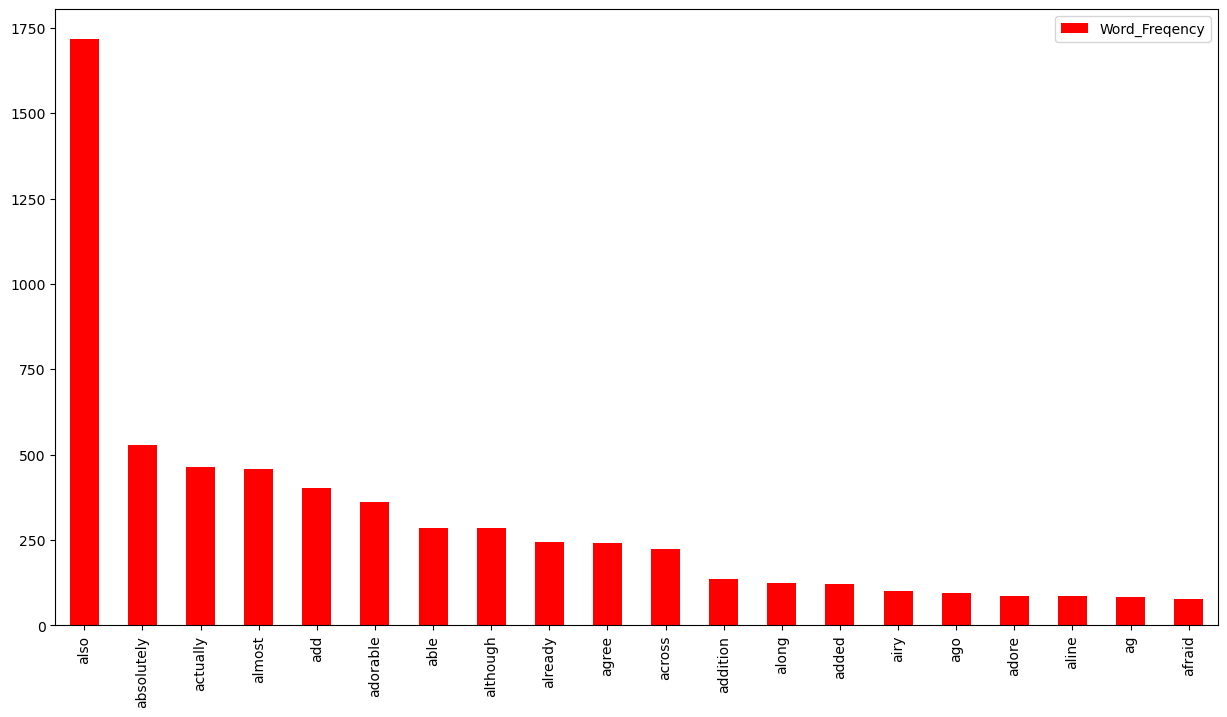

In [188]:
word_freq_neg.plot(kind='bar', figsize=(15,8), color='red')

## For postive sentiments---- Word Clouds 

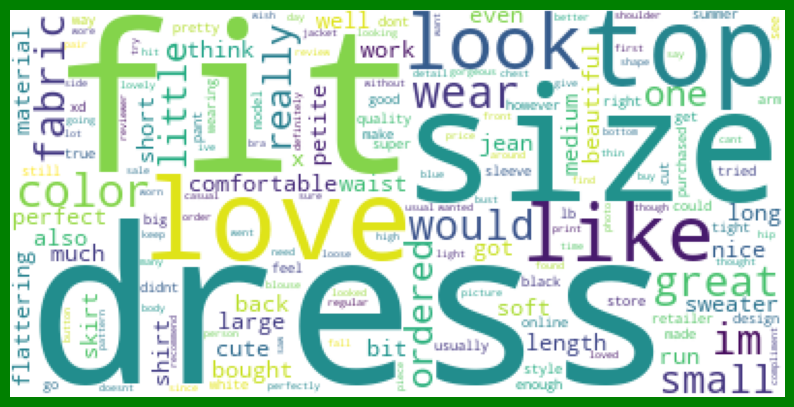

In [178]:
from wordcloud import WordCloud ,STOPWORDS

wc = WordCloud(background_color='white', stopwords=sw)
wc = wc.generate_from_frequencies(word_freq_dict)

fig = plt.figure(1, figsize=(10, 10), facecolor ='Green')
plt.axis('off')
plt.imshow(wc)
plt.show()

## For negative sentiments---- Word Clouds 

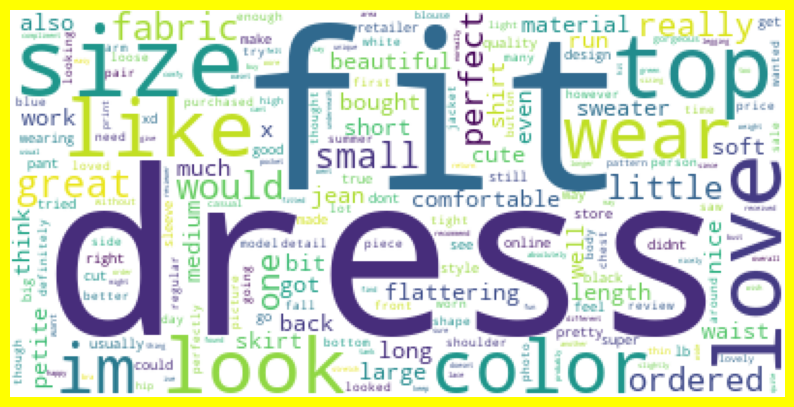

In [189]:
wc1 = WordCloud(background_color='white', stopwords=sw)
wc1 = wc1.generate_from_frequencies(word_freq_dict_neg)

fig = plt.figure(1, figsize=(10, 10), facecolor ='Yellow')
plt.axis('off')
plt.imshow(wc1)
plt.show()

## c. Understand sentiment among the customers on the different categories, sub categories,products by location and age group

In [256]:
df_wcr_customer=df_txt
df_wcr_customer.head(2)

In [257]:
df_wcr_customer['Age_Group']=pd.cut(df_wcr_customer.Customer_Age, np.arange(10,90,10), labels=['10-20','20-30','30-40','40-50', '50-60', '60-70','70-80'])

In [258]:
df_wcr_customer.head(2)

,Product_ID,Category,Subcategory1,SubCategory2,Location,Channel,Customer_Age,Review_Title,Review_Text,Rating,Recommend_Flag,sentiment,sentiment_cat,Age_Group
2,1077,General,Dresses,Dresses,Gurgaon,Mobile,60,Some major design flaws,I had such high hopes for this dress and reall...,3,0,0.073675,Negative,50-60
3,1049,General Petite,Bottoms,Pants,Chennai,Web,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,1,0.550000,Positive,40-50


In [259]:
df_wcr_customer.groupby(['Category','Subcategory1','SubCategory2', 'Location', 'Age_Group']).sentiment_cat.value_counts()

Category   Subcategory1  SubCategory2    Location   Age_Group  sentiment_cat
General    Bottoms       Casual bottoms  Mumbai     20-30      Positive          1
                         Jeans           Bangalore  20-30      Positive         14
                                                               Negative          1
                                                    30-40      Positive         32
                                                               Negative         12
                                                                                ..
Initmates  Intimate      Swim            Mumbai     40-50      Positive         26
                                                               Negative          3
                                                    50-60      Positive          6
                                                               Negative          1
                                                    60-70      Negative          1
Name: sent

## d. Perform predictive analytics to understand the drivers of customers who are recommending the products.
### Classification Model

In [260]:
df_wcr_customer.head(2)

,Product_ID,Category,Subcategory1,SubCategory2,Location,Channel,Customer_Age,Review_Title,Review_Text,Rating,Recommend_Flag,sentiment,sentiment_cat,Age_Group
2,1077,General,Dresses,Dresses,Gurgaon,Mobile,60,Some major design flaws,I had such high hopes for this dress and reall...,3,0,0.073675,Negative,50-60
3,1049,General Petite,Bottoms,Pants,Chennai,Web,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,1,0.550000,Positive,40-50


In [262]:
## X-variable is Review_text and y-variable(Target Variable) is Rating
# define X and y
X_recom = df_wcr_customer.Review_Text
y_recom = df_wcr_customer.Recommend_Flag

# split the new DataFrame into training and testing sets
X_recom_train, X_recom_test, y_recom_train, y_recom_test = train_test_split(X_recom, X_recom, random_state=1)

In [264]:
# Clean the data
X_recom_train = X_recom_train.apply(lambda x: clean_text(x))
X_recom_test = X_recom_test.apply(lambda x: clean_text(x))

In [268]:
# CountVector for Train data

count_vect = CountVectorizer(analyzer='word', 
                             token_pattern=r'\w{1,}', 
                             ngram_range=(1, 1 ), 
                             min_df=5, 
                             lowercase = True,
                             encoding='latin-1' , 
                             max_features=100)
X_recom_train_count = count_vect.fit_transform(X_recom_train)

tfidf_vect = TfidfVectorizer(analyzer='word', 
                             token_pattern=r'\w{1,}', 
                             ngram_range=(1, 1 ), 
                             min_df=5, 
                             encoding='latin-1' , 
                             lowercase = True,
                             max_features=100)
X_recom_train_tfidf = tfidf_vect.fit_transform(X_recom_train)

In [269]:
# CountVector for Test data

X_recom_test_count = count_vect.transform(X_recom_test)
X_recom_test_tfidf = tfidf_vect.transform(X_recom_test)

In [270]:
dtm_count=pd.DataFrame(X_recom_train_count.toarray(), columns=count_vect.get_feature_names_out())
dtm_tfidf=pd.DataFrame(X_recom_train_tfidf.toarray(), columns=tfidf_vect.get_feature_names_out())

In [271]:
dtm_count

,a,all,also,am,an,and,are,as,at,back,...,was,wear,well,when,which,will,with,would,xs,you
0,1,0,0,1,0,2,0,0,0,0,...,1,0,0,0,0,0,0,1,0,0
1,3,0,0,0,0,2,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
2,3,0,2,0,0,4,0,0,2,0,...,1,0,0,1,0,1,2,0,0,0
3,4,0,0,0,0,7,1,0,1,0,...,0,0,0,0,0,0,1,0,0,0
4,0,0,0,0,3,5,0,0,1,0,...,2,0,0,2,0,1,3,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14741,4,0,0,0,0,2,0,1,0,0,...,0,0,1,0,0,1,0,0,0,0
14742,3,0,0,1,0,8,0,0,0,0,...,1,0,0,0,0,0,1,1,0,0
14743,3,0,0,0,0,2,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
14744,1,0,0,0,0,3,1,0,0,1,...,0,0,0,1,0,0,0,0,0,0


In [272]:
dtm_tfidf

,a,all,also,am,an,and,are,as,at,back,...,was,wear,well,when,which,will,with,would,xs,you
0,0.081690,0.0,0.000000,0.168737,0.000000,0.151780,0.000000,0.000000,0.000000,0.000000,...,0.135717,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.175293,0.000000,0.000000
1,0.320698,0.0,0.000000,0.000000,0.000000,0.198620,0.000000,0.000000,0.000000,0.000000,...,0.177600,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000
2,0.146450,0.0,0.257177,0.000000,0.000000,0.181404,0.000000,0.000000,0.215361,0.000000,...,0.081103,0.0,0.000000,0.125183,0.0,0.117989,0.148975,0.000000,0.000000,0.000000
3,0.217324,0.0,0.000000,0.000000,0.000000,0.353318,0.105702,0.000000,0.119844,0.000000,...,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.082902,0.000000,0.000000,0.000000
4,0.000000,0.0,0.000000,0.000000,0.343415,0.220282,0.000000,0.000000,0.104606,0.000000,...,0.157575,0.0,0.000000,0.243219,0.0,0.114620,0.217083,0.000000,0.137444,0.105954
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14741,0.217087,0.0,0.000000,0.000000,0.000000,0.100838,0.000000,0.111387,0.000000,0.000000,...,0.000000,0.0,0.133248,0.000000,0.0,0.131173,0.000000,0.000000,0.000000,0.000000
14742,0.172503,0.0,0.000000,0.118773,0.000000,0.427350,0.000000,0.000000,0.000000,0.000000,...,0.095530,0.0,0.000000,0.000000,0.0,0.000000,0.087738,0.123388,0.000000,0.000000
14743,0.231916,0.0,0.000000,0.000000,0.000000,0.143634,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.165885,0.000000,0.000000
14744,0.050895,0.0,0.000000,0.000000,0.000000,0.141845,0.099016,0.000000,0.000000,0.127619,...,0.000000,0.0,0.000000,0.130512,0.0,0.000000,0.000000,0.000000,0.000000,0.000000


## Dummy creation

In [ ]:
# Adding Features to a Document-Term Matrix

In [279]:
# UDF to create dummy variable
def create_dummies(df, colname):
    col_dummies = pd.get_dummies(df[colname], prefix = colname, drop_first = True)
    df = pd.concat([df, col_dummies], axis = 1)
    df.drop(colname, axis = 1, inplace = True )
    return df

In [280]:
cat_vars = df_wcr_customer[['Category', 'Subcategory1', 'SubCategory2', 'sentiment_cat','Location', 'Channel']]

for f in ['Category', 'Subcategory1', 'SubCategory2', 'sentiment_cat','Location', 'Channel']:
    cat_vars[f] = cat_vars[f].astype('category')
    cat_vars = create_dummies(cat_vars, f)
    
cat_vars.head()


C:\Users\Divya\AppData\Local\Temp\ipykernel_13052\734829382.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cat_vars[f] = cat_vars[f].astype('category')


,Category_General Petite,Category_Initmates,Subcategory1_Dresses,Subcategory1_Intimate,Subcategory1_Jackets,Subcategory1_Tops,Subcategory1_Trend,SubCategory2_Casual bottoms,SubCategory2_Chemises,SubCategory2_Dresses,...,SubCategory2_Sleep,SubCategory2_Sweaters,SubCategory2_Swim,SubCategory2_Trend,sentiment_cat_Neutral,sentiment_cat_Positive,Location_Chennai,Location_Gurgaon,Location_Mumbai,Channel_Web
2,0,0,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,1,0,0,1
4,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,1,0,0,0,1
5,0,0,1,0,0,0,0,0,0,1,...,0,0,0,0,0,1,0,1,0,1
6,1,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,1,0,1,0,0


In [283]:
df_recom =df_wcr_customer.loc[:, [ 'Review_Text', 'Customer_Age', 'Rating', 'sentiment','Recommend_Flag']]
df_recom.head()

,Review_Text,Customer_Age,Rating,sentiment,Recommend_Flag
2,I had such high hopes for this dress and reall...,60,3,0.073675,0
3,"I love, love, love this jumpsuit. it's fun, fl...",50,5,0.550000,1
4,This shirt is very flattering to all due to th...,47,5,0.512891,1
5,"I love tracy reese dresses, but this one is no...",49,2,0.178750,0
6,I aded this in my basket at hte last mintue to...,39,5,0.133750,1


In [294]:
df_recom[df_recom.Customer_Age==60].Rating.agg({'min', 'max'})

min    1
max    5
Name: Rating, dtype: int64

In [297]:
data_recom = pd.concat([ df_recom,cat_vars], axis =1)
data_recom.head(2)

,Review_Text,Customer_Age,Rating,sentiment,Recommend_Flag,Category_General Petite,Category_Initmates,Subcategory1_Dresses,Subcategory1_Intimate,Subcategory1_Jackets,...,SubCategory2_Sleep,SubCategory2_Sweaters,SubCategory2_Swim,SubCategory2_Trend,sentiment_cat_Neutral,sentiment_cat_Positive,Location_Chennai,Location_Gurgaon,Location_Mumbai,Channel_Web
2,I had such high hopes for this dress and reall...,60,3,0.073675,0,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
3,"I love, love, love this jumpsuit. it's fun, fl...",50,5,0.550000,1,1,0,0,0,0,...,0,0,0,0,0,1,1,0,0,1


In [298]:
data_recom.columns

Index(['Review_Text', 'Customer_Age', 'Rating', 'sentiment', 'Recommend_Flag',
       'Category_General Petite', 'Category_Initmates', 'Subcategory1_Dresses',
       'Subcategory1_Intimate', 'Subcategory1_Jackets', 'Subcategory1_Tops',
       'Subcategory1_Trend', 'SubCategory2_Casual bottoms',
       'SubCategory2_Chemises', 'SubCategory2_Dresses',
       'SubCategory2_Fine gauge', 'SubCategory2_Intimates',
       'SubCategory2_Jackets', 'SubCategory2_Jeans', 'SubCategory2_Knits',
       'SubCategory2_Layering', 'SubCategory2_Legwear', 'SubCategory2_Lounge',
       'SubCategory2_Outerwear', 'SubCategory2_Pants', 'SubCategory2_Shorts',
       'SubCategory2_Skirts', 'SubCategory2_Sleep', 'SubCategory2_Sweaters',
       'SubCategory2_Swim', 'SubCategory2_Trend', 'sentiment_cat_Neutral',
       'sentiment_cat_Positive', 'Location_Chennai', 'Location_Gurgaon',
       'Location_Mumbai', 'Channel_Web'],
      dtype='object')

In [301]:
#define X and y
feature_cols = ['Review_Text', 'Customer_Age', 'Rating', 'sentiment', 'Recommend_Flag',
       'Category_General Petite', 'Category_Initmates', 'Subcategory1_Dresses',
       'Subcategory1_Intimate', 'Subcategory1_Jackets', 'Subcategory1_Tops',
       'Subcategory1_Trend', 'SubCategory2_Casual bottoms',
       'SubCategory2_Chemises', 'SubCategory2_Dresses',
       'SubCategory2_Fine gauge', 'SubCategory2_Intimates',
       'SubCategory2_Jackets', 'SubCategory2_Jeans', 'SubCategory2_Knits',
       'SubCategory2_Layering', 'SubCategory2_Legwear', 'SubCategory2_Lounge',
       'SubCategory2_Outerwear', 'SubCategory2_Pants', 'SubCategory2_Shorts',
       'SubCategory2_Skirts', 'SubCategory2_Sleep', 'SubCategory2_Sweaters',
       'SubCategory2_Swim', 'SubCategory2_Trend', 'sentiment_cat_Neutral',
       'sentiment_cat_Positive', 'Location_Chennai', 'Location_Gurgaon',
       'Location_Mumbai', 'Channel_Web']
X = data_recom[feature_cols]
y = data_recom.Recommend_Flag

#split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)


In [302]:
X_train.Review_Text

20666    Perhaps i have gotten too used to flowy shirts...
20719    I sized up to a medium from a small and was gl...
11510    I bought this sweater in the green and loved i...
22208    I didn't notice what some of the other reviews...
12234    I agree with some of the other reviewers; this...
                               ...                        
13097    This dress intrigued me a bit online, but not ...
20651    It just didn't work for me. i don't know if it...
6203     I've been looking for a great long, loose, ver...
14529    I bought the denim ch rocket high-rise crop la...
303      I wore this dress for the first time yesterday...
Name: Review_Text, Length: 14746, dtype: object

In [303]:
# use  TfidfVectorizer with Review_Text column only
vect = TfidfVectorizer(lowercase=True, stop_words='english', max_features=100, min_df=5, ngram_range=(1, 2))
X_train_dtm = vect.fit_transform(X_train.Review_Text)
X_test_dtm = vect.transform(X_test.Review_Text)
print(X_train_dtm.shape)
print(X_test_dtm.shape)

(14746, 100)
(4916, 100)


In [305]:
# use CountVectorizer with Review_Text column only
vect = CountVectorizer(lowercase=True, stop_words='english', max_features=100, min_df=5, ngram_range=(1, 2))
X_train_dtm = vect.fit_transform(X_train.Review_Text)
X_test_dtm = vect.transform(X_test.Review_Text)
print(X_train_dtm.shape)
print(X_test_dtm.shape)

(14746, 100)
(4916, 100)


In [308]:
# cast other feature columns to float and convert to a sparse matrix
extra = sparse.csr_matrix(X_train.drop('Review_Text', axis=1).astype(float))
extra.shape

# combine sparse matrices
X_train_dtm_extra = sparse.hstack((X_train_dtm, extra))
X_train_dtm_extra.shape

# repeat for testing set
extra = sparse.csr_matrix(X_test.drop('Review_Text', axis=1).astype(float))
X_test_dtm_extra = sparse.hstack((X_test_dtm, extra))
X_test_dtm_extra.shape

(4916, 136)

In [312]:
# use logistic regression with text column only

from sklearn.linear_model import LogisticRegression
from sklearn import model_selection, preprocessing, linear_model, naive_bayes, metrics
logreg = LogisticRegression(C=1e9)
logreg.fit(X_train_dtm, y_train)
y_pred_class = logreg.predict(X_test_dtm)
print(metrics.accuracy_score(y_test, y_pred_class))


0.8403173311635476


In [313]:
# Finding the score for validation

from sklearn.metrics import precision_recall_fscore_support as score
from sklearn.metrics import roc_auc_score,accuracy_score

tr_pred=logreg.predict(X_train_dtm)
y_pred = logreg.predict(X_test_dtm)


trprecision,trrecall,trfscore,trsupport=score(y_train,tr_pred)
tracc=accuracy_score(y_train,tr_pred)
precision,recall,fscore,support=score(y_test,y_pred)
acc=accuracy_score(y_test,y_pred)

In [314]:
# Finding the score for validation
from sklearn.metrics import precision_recall_fscore_support as score
from sklearn.metrics import roc_auc_score,accuracy_score

tr_pred=logreg.predict(X_train_dtm)
y_pred = logreg.predict(X_test_dtm)

trprecision,trrecall,trfscore,trsupport=score(y_train,tr_pred)
tracc=accuracy_score(y_train,tr_pred)
precision,recall,fscore,support=score(y_test,y_pred)
acc=accuracy_score(y_test,y_pred)

In [315]:
print('Precision : ',trprecision)
print('\nRecall : ',trrecall)
print('\nF-Score :',trfscore)
print('\nAccuracy : ',tracc)

Precision :  [0.63893376 0.86111934]

Recall :  [0.29658793 0.96299363]

F-Score : [0.40512164 0.90921171]

Accuracy :  0.8424657534246576


In [316]:
# For Testing
print('Precision : ',precision)
print('\nRecall : ',recall)
print('\nF-Score :',fscore)
print('\nAccuracy : ',acc)

Precision :  [0.63945578 0.86011173]

Recall :  [0.31057269 0.96032934]

F-Score : [0.41808747 0.90746198]

Accuracy :  0.8403173311635476


### So, in the logistic model where Y variable(Target variable) is Recommend_flag and X variable is Review_Text. The model gives accuracy of 84% in train and test. 
#### The difference between train and test accuracy is less so, we can say the model is good to use. The main key drivers who are responsible for recommending the product are:

In [319]:
# vect = TfidfVectorizer(lowercase=True, stop_words='english', max_features=100, min_df=5, ngram_range=(1, 2))
print(vect.get_feature_names_out())

['_x000d_' 'arms' 'beautiful' 'better' 'big' 'bit' 'black' 'blue' 'body'
 'bought' 'chest' 'color' 'colors' 'comfortable' 'cut' 'cute' 'definitely'
 'design' 'did' 'didn' 'does' 'don' 'dress' 'fabric' 'fall' 'feel' 'fit'
 'fits' 'flattering' 'going' 'good' 'got' 'great' 'high' 'jacket' 'jeans'
 'just' 'large' 'lbs' 'length' 'like' 'little' 'long' 'look' 'looked'
 'looking' 'looks' 'loose' 'love' 'loved' 'material' 'medium' 'model'
 'nice' 'online' 'ordered' 'pants' 'perfect' 'perfectly' 'person' 'petite'
 'pretty' 'price' 'purchased' 'quality' 'really' 'regular' 'retailer'
 'right' 'runs' 'sale' 'shirt' 'short' 'size' 'skirt' 'sleeves' 'small'
 'soft' 'store' 'style' 'summer' 'super' 'sweater' 'think' 'tight' 'time'
 'tried' 'true' 'true size' 'try' 'usually' 've' 'waist' 'way' 'wear'
 'wearing' 'white' 'work' 'worn' 'xs']


## e.Create topics and understand themes behind the topics by performing topic mining.

In [321]:
# Importing Gensim
import gensim
from gensim import corpora


In [322]:
X_train_tokens = [doc.split() for doc in X_train]  
X_train_tokens

[['Review_Text'],
 ['Customer_Age'],
 ['Rating'],
 ['sentiment'],
 ['Recommend_Flag'],
 ['Category_General', 'Petite'],
 ['Category_Initmates'],
 ['Subcategory1_Dresses'],
 ['Subcategory1_Intimate'],
 ['Subcategory1_Jackets'],
 ['Subcategory1_Tops'],
 ['Subcategory1_Trend'],
 ['SubCategory2_Casual', 'bottoms'],
 ['SubCategory2_Chemises'],
 ['SubCategory2_Dresses'],
 ['SubCategory2_Fine', 'gauge'],
 ['SubCategory2_Intimates'],
 ['SubCategory2_Jackets'],
 ['SubCategory2_Jeans'],
 ['SubCategory2_Knits'],
 ['SubCategory2_Layering'],
 ['SubCategory2_Legwear'],
 ['SubCategory2_Lounge'],
 ['SubCategory2_Outerwear'],
 ['SubCategory2_Pants'],
 ['SubCategory2_Shorts'],
 ['SubCategory2_Skirts'],
 ['SubCategory2_Sleep'],
 ['SubCategory2_Sweaters'],
 ['SubCategory2_Swim'],
 ['SubCategory2_Trend'],
 ['sentiment_cat_Neutral'],
 ['sentiment_cat_Positive'],
 ['Location_Chennai'],
 ['Location_Gurgaon'],
 ['Location_Mumbai'],
 ['Channel_Web']]

In [324]:
dictionary = corpora.Dictionary(X_train_tokens)
print(dictionary)

Dictionary<40 unique tokens: ['Review_Text', 'Customer_Age', 'Rating', 'sentiment', 'Recommend_Flag']...>


In [325]:
doc_term_matrix = [dictionary.doc2bow(doc) for doc in X_train_tokens]

# Creating the object for LDA model using gensim library
Lda = gensim.models.ldamodel.LdaModel

# Running and Trainign LDA model on the document term matrix.
ldamodel = Lda(doc_term_matrix, num_topics=5, id2word = dictionary,passes=1)
print(ldamodel.print_topics(num_topics=5, num_words=20))

[(0, '0.069*"SubCategory2_Pants" + 0.069*"Location_Gurgaon" + 0.069*"SubCategory2_Skirts" + 0.069*"SubCategory2_Outerwear" + 0.069*"sentiment_cat_Neutral" + 0.069*"SubCategory2_Jeans" + 0.069*"Recommend_Flag" + 0.069*"SubCategory2_Intimates" + 0.069*"SubCategory2_Swim" + 0.012*"SubCategory2_Jackets" + 0.012*"sentiment" + 0.012*"Review_Text" + 0.012*"Channel_Web" + 0.012*"Subcategory1_Tops" + 0.012*"SubCategory2_Lounge" + 0.012*"Location_Mumbai" + 0.012*"SubCategory2_Knits" + 0.012*"SubCategory2_Layering" + 0.012*"SubCategory2_Chemises" + 0.012*"Rating"'), (1, '0.084*"gauge" + 0.084*"SubCategory2_Fine" + 0.083*"Rating" + 0.083*"Location_Mumbai" + 0.083*"SubCategory2_Legwear" + 0.083*"sentiment" + 0.015*"Channel_Web" + 0.015*"Subcategory1_Dresses" + 0.015*"Subcategory1_Tops" + 0.015*"SubCategory2_Swim" + 0.015*"SubCategory2_Shorts" + 0.015*"SubCategory2_Jeans" + 0.015*"sentiment_cat_Positive" + 0.015*"Recommend_Flag" + 0.015*"SubCategory2_Outerwear" + 0.015*"Review_Text" + 0.015*"SubCate

In [326]:
topics = ldamodel.show_topics(formatted=False, num_words=30)
    
for t in range(len(topics)):
    print("\nTopic {}, top {} words:".format(t+1,30))
    print(" ".join([w[0] for w in topics[t][1]]))


Topic 1, top 30 words:
SubCategory2_Pants Location_Gurgaon SubCategory2_Skirts SubCategory2_Outerwear sentiment_cat_Neutral SubCategory2_Jeans Recommend_Flag SubCategory2_Intimates SubCategory2_Swim SubCategory2_Jackets sentiment Review_Text Channel_Web Subcategory1_Tops SubCategory2_Lounge Location_Mumbai SubCategory2_Knits SubCategory2_Layering SubCategory2_Chemises Rating Location_Chennai Subcategory1_Trend sentiment_cat_Positive SubCategory2_Legwear SubCategory2_Sleep SubCategory2_Dresses SubCategory2_Trend Category_Initmates Subcategory1_Dresses Subcategory1_Jackets

Topic 2, top 30 words:
gauge SubCategory2_Fine Rating Location_Mumbai SubCategory2_Legwear sentiment Channel_Web Subcategory1_Dresses Subcategory1_Tops SubCategory2_Swim SubCategory2_Shorts SubCategory2_Jeans sentiment_cat_Positive Recommend_Flag SubCategory2_Outerwear Review_Text SubCategory2_Intimates SubCategory2_Sleep Customer_Age SubCategory2_Knits Location_Gurgaon SubCategory2_Trend Subcategory1_Trend SubCatego

In [329]:
# train a LDA Model
lda_model = decomposition.LatentDirichletAllocation(n_components=10, learning_method='online', max_iter=20)
X_topics = lda_model.fit_transform(X_train_dtm)
topic_word = lda_model.components_ 
vocab = count_vect.get_feature_names_out()

# view the topic models
n_top_words = 40
topic_summaries = []
for i, topic_dist in enumerate(topic_word):
    topic_words = np.array(vocab)[np.argsort(topic_dist)][:-(n_top_words+1):-1]
    topic_summaries.append(' '.join(topic_words))

topic_summaries

['a if my fits look has which bit back for are nice beautiful had that im large pretty they down would quality have was long fabric like these its when even much perfect small but well also flattering will ordered',
 'so up very can shirt or out fits has pretty have ordered also back had much because even for beautiful bought which im look jeans of and more bit long them am its medium that cute large perfect with xs',
 'than so in material much which was really fits to an be you jeans pretty and had is flattering this one perfect im also cute look got long nice ordered when with them its waist small at are has more',
 'dress colors not look also flattering fits for im which bit even love will so because back this had quality much beautiful pretty and jeans are at of am is cute its perfect has one small on got large to',
 'top the comfortable its im length large even looks more fits waist bought when perfect for quality beautiful so of am would much also at an small and me down great me

##              ***************** END *******************